In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os

# Data  preparation

In [3]:
filepath = r'C:\Users\chd\Desktop\data\wine-reviews'

In [4]:
data = pd.read_csv(os.path.join(filepath,'winemag-data_first150k.csv'))

In [5]:
attribute = data.columns
print(attribute)

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')


# data summary

In [6]:
nominal = [attribute[i] for i in [1,2,3,6,7,8,9,10]]
print('标称属性:',nominal)
numeric = [attribute[i] for i in [4,5]]
print('数值属性:',numeric)

标称属性: ['country', 'description', 'designation', 'province', 'region_1', 'region_2', 'variety', 'winery']
数值属性: ['points', 'price']


In [7]:
for a  in numeric:
    n = data[a].shape[0]-1
    split = [int(i*n) for i in [0,0.25,0.5,0.75,1]] 
    data[a] = data[a].fillna(data[a].mean())
    num = [data[a].sort_values().iloc[i]  for i in split]
    print(a+' 五数概括:', num)

points 五数概括: [80, 86, 88, 90, 100]
price 五数概括: [4.0, 16.0, 26.0, 38.0, 2300.0]


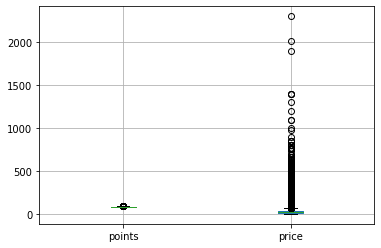

In [8]:
data[numeric].boxplot() #盒图

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029C7FED1588>,
      dtype=object)

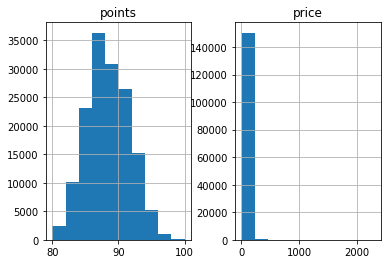

In [9]:
data[numeric].hist() #直方图

# Incomplete (Missing) Data


1  Ignore the tuple

In [10]:
data = pd.read_csv(os.path.join(filepath,'winemag-data_first150k.csv'))
d1 = data.dropna()                        #删除缺失数据

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029C7FED1048>,
      dtype=object)

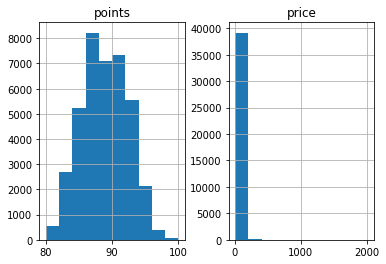

In [11]:
d1[numeric].hist()

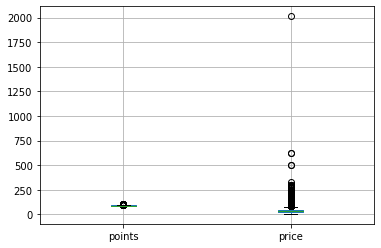

In [12]:
d1[numeric].boxplot()

2、 Replace with the most frequent data

In [13]:
d2 = pd.read_csv(os.path.join(filepath,'winemag-data_first150k.csv'))
for i in range(1,11):
    d2[attribute[i]] = d2[attribute[i]].fillna(value= d2[attribute[i]].value_counts().index[0]) #用最高频率替换

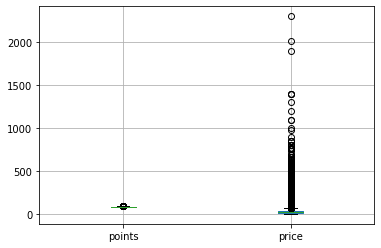

In [14]:
d2[numeric].boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029C7F827208>,
      dtype=object)

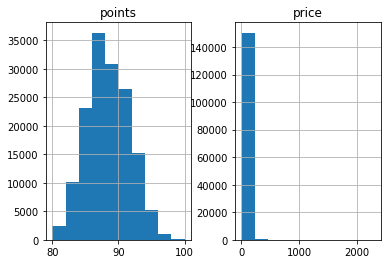

In [15]:
d2[numeric].hist()

3 Replace with related attribute


There are only two numeric attributes so this substitution does not exist


4  Replace with similar data

In [29]:
d4 = pd.read_csv(os.path.join(filepath,'winemag-data_first150k.csv')) #根据数据相似度替换

123

In [30]:
def sim(x):
    maxsim = 0
    idx = -1
    for i in range(50):
        tmp = 0
        flag = 1
        for j in list(range(4,11))+[1]:
            if x.iloc[j] == d4.iloc[i,j]:
                tmp+=1
        if tmp>maxsim:
            idx = d4.iloc[i]
            maxsim = tmp
        if maxsim>=3:
            break
            
    for i in range(1,11):
        if pd.isna(x.iloc[j]):
            x.iloc[i] = idx.iloc[i]
    return x

In [28]:
for i in tqdm.tqdm(range(d4.shape[0])):
    x = d4.iloc[i]
    if x.isnull().any():
        simx = sim(x)
        d4.iloc[i] = simx


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 435.50it/s]


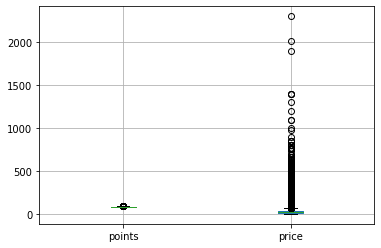

In [31]:
d4[numeric].boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029C0B904E08>,
      dtype=object)

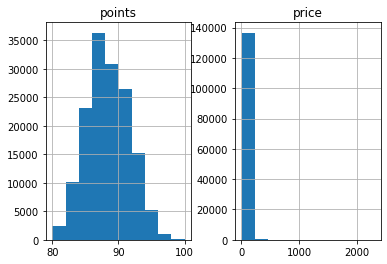

In [32]:
d4[numeric].hist()